In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
# data = pd.read_csv('2021.csv')
data = pd.read_csv('mpi_roof1.csv',)

In [4]:
data.reset_index(inplace=True)
data

,index,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m?,PAR (ol/m?s),max. PAR (ol/m?s),Tlog (degC),CO2 (ppm)
0,0,01.07.2021 00:10:00,985.02,16.07,290.47,12.89,81.4,18.29,14.89,3.40,...,0.78,1.43,235.7,0.0,0.0,0.00,0.00,0.00,26.35,420.2
1,1,01.07.2021 00:20:00,985.04,16.02,290.42,12.93,81.9,18.23,14.93,3.30,...,1.05,2.15,219.2,0.0,0.0,0.00,0.00,0.00,26.30,419.9
2,2,01.07.2021 00:30:00,985.04,15.96,290.36,12.95,82.3,18.16,14.95,3.21,...,0.91,1.47,234.1,0.0,0.0,0.00,0.00,0.00,26.25,420.6
3,3,01.07.2021 00:40:00,985.00,15.87,290.27,12.97,82.9,18.06,14.97,3.09,...,0.90,1.83,237.6,0.0,0.0,0.00,0.00,0.00,26.23,420.9
4,4,01.07.2021 00:50:00,985.02,15.79,290.19,12.99,83.4,17.97,14.98,2.98,...,1.07,1.93,232.3,0.0,0.0,0.00,0.00,0.00,26.21,421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25991,25991,28.12.2021 12:00:00,972.20,5.10,280.50,3.96,92.3,8.79,8.11,0.68,...,2.73,5.64,172.9,0.0,0.0,136.20,265.80,274.37,14.57,438.8
25992,25992,28.12.2021 12:10:00,971.92,5.37,280.80,4.12,91.6,8.96,8.20,0.75,...,3.04,5.61,170.0,0.0,0.0,209.39,397.75,533.95,14.75,437.4
25993,25993,28.12.2021 12:20:00,971.64,5.73,281.19,4.27,90.3,9.19,8.30,0.89,...,3.52,4.87,164.9,0.0,0.0,259.59,482.85,591.58,14.95,436.6
25994,25994,28.12.2021 12:30:00,971.48,5.86,281.32,4.27,89.5,9.27,8.29,0.97,...,3.06,5.45,162.2,0.0,0.0,130.12,248.07,299.64,15.19,436.5


## Raw Data Visualization

为了让我们更直观的感受我们将要处理的数据，我们将每个特征的值（除了风向）画了出来。  
这是2021年1月1号到2021年12月27号各个特征的图表（每三小时采一次样）

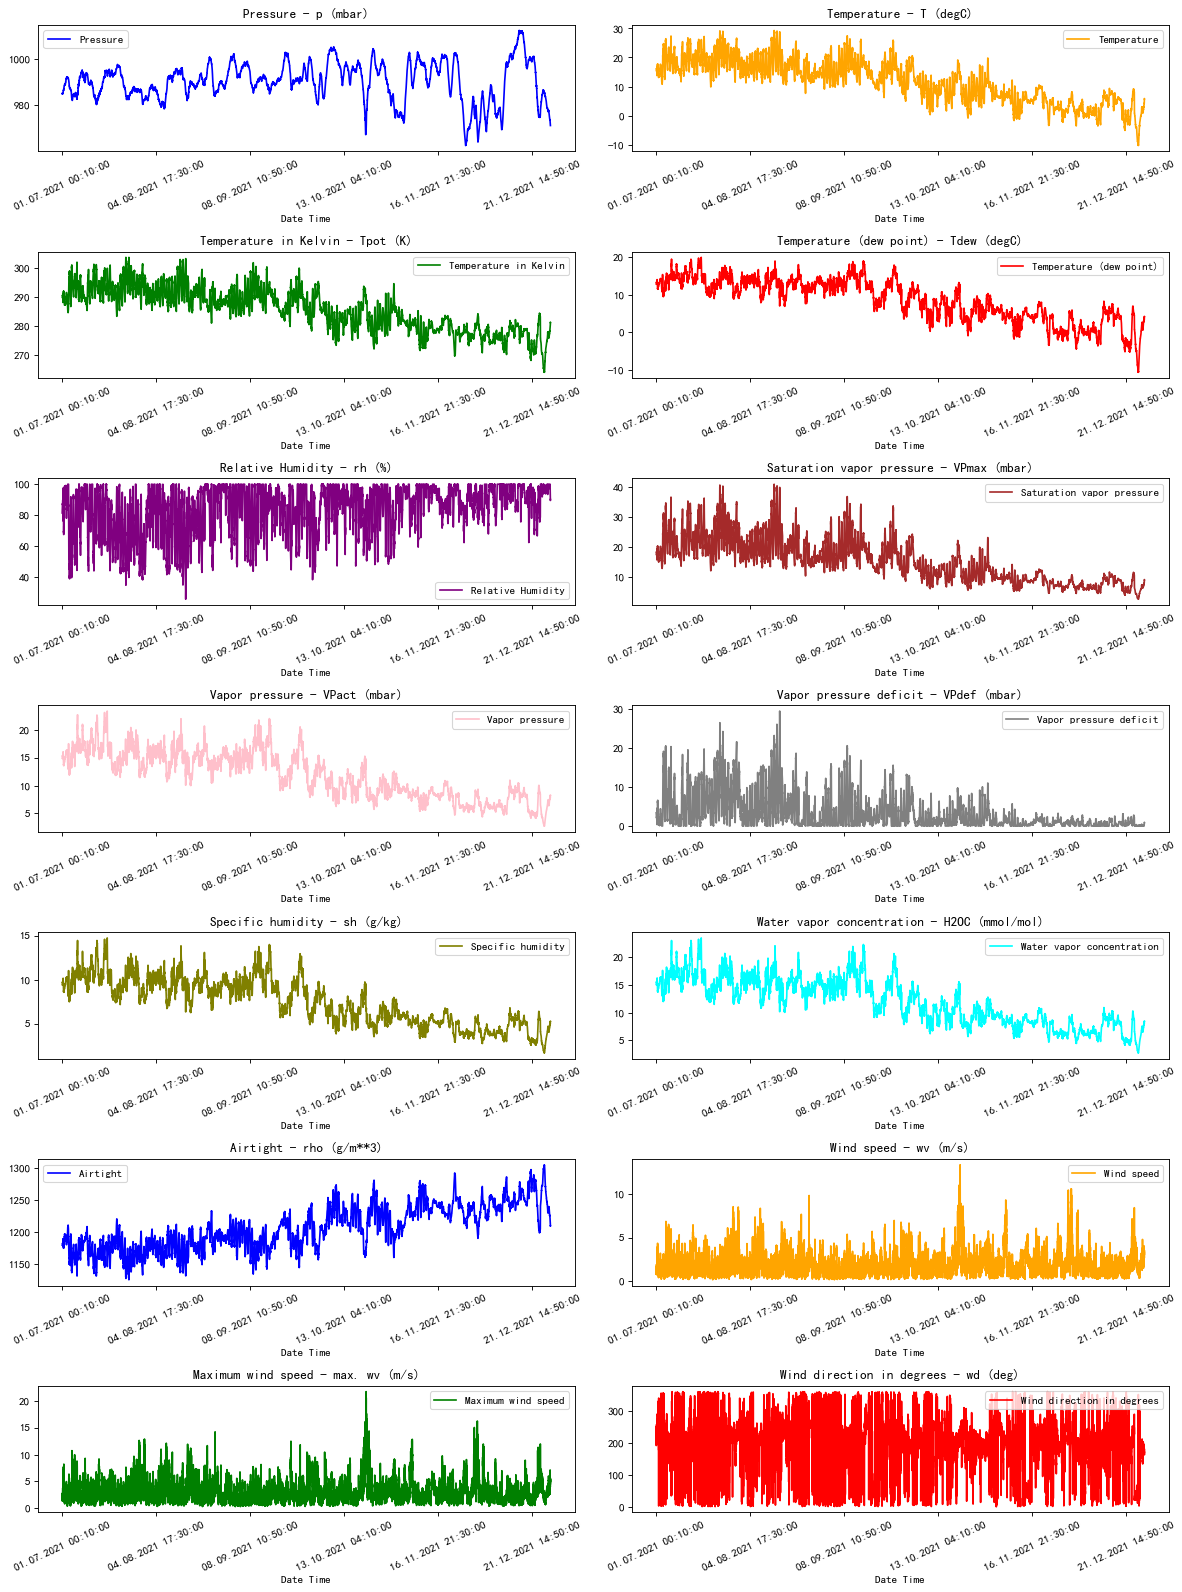

In [5]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(data)

下面是不同特征之间相关性的热力图

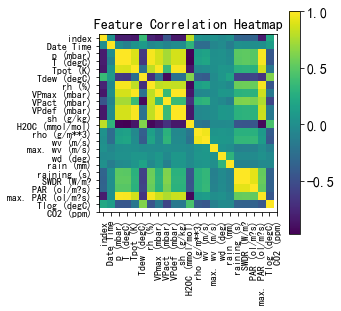

In [6]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=10, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=10)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(data)

## Data Preprocessing

为了让神经网络更好的学习到特征，我们将数值类数据进行标准化，并对离散型数据（风向）进行处理  
标准化在神经网络学习中是十分有效的方法

In [7]:
df = data

In [8]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

# features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

# train_data = features.loc[0 : train_split - 1]
# val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.07.2021 00:10:00,985.02,16.07,18.29,3.40,9.46,1179.66,0.78
01.07.2021 00:20:00,985.04,16.02,18.23,3.30,9.48,1179.87,1.05
01.07.2021 00:30:00,985.04,15.96,18.16,3.21,9.49,1180.11,0.91
01.07.2021 00:40:00,985.00,15.87,18.06,3.09,9.51,1180.41,0.90
01.07.2021 00:50:00,985.02,15.79,17.97,2.98,9.52,1180.76,1.07


In [9]:
data_np = features.to_numpy()
print(data_np.shape)
data_np = data_np[:,[1,0,2,3,4,5,6]]
data_np

(25996, 7)


array([[1.60700e+01, 9.85020e+02, 1.82900e+01, ..., 9.46000e+00,
        1.17966e+03, 7.80000e-01],
       [1.60200e+01, 9.85040e+02, 1.82300e+01, ..., 9.48000e+00,
        1.17987e+03, 1.05000e+00],
       [1.59600e+01, 9.85040e+02, 1.81600e+01, ..., 9.49000e+00,
        1.18011e+03, 9.10000e-01],
       ...,
       [5.73000e+00, 9.71640e+02, 9.19000e+00, ..., 5.33000e+00,
        1.20979e+03, 3.52000e+00],
       [5.86000e+00, 9.71480e+02, 9.27000e+00, ..., 5.33000e+00,
        1.20905e+03, 3.06000e+00],
       [5.74000e+00, 9.71420e+02, 9.19000e+00, ..., 5.32000e+00,
        1.20949e+03, 3.09000e+00]])

In [10]:
# Building The Datasets
past = 18
future = 6
dataset = np.empty((data_np.shape[0]-past-future,18,7))
dataset_y = np.empty((data_np.shape[0]-past-future,1))
for i in range(data_np.shape[0]-past-future):
    for j in range(past):
        dataset[i,j] = data_np[i+j][0:]
    dataset_y[i] = data_np[i+past+future][0]

In [11]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
idx = np.arange(data_np.shape[0]-past-future)
train_idx, valid_idx = train_test_split(idx, shuffle=True, test_size=0.1, random_state=2021)

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scaler
# 对1，2，3，4, 5，6特征进行标准化
transformers = []
for i in tqdm([1,2,3,4,5,6]):
    a = np.nan_to_num(dataset[train_idx, :, i])
    b = np.nan_to_num(dataset[valid_idx, :, i])

    transformer = StandardScaler() # StandardScaler is very useful!
    dataset[train_idx, :, i] = transformer.fit_transform(a)
    dataset[valid_idx, :, i] = transformer.transform(b)
    transformers.append(transformer) # Save Scalers for the inference stage

  0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
dataset = dataset.transpose(0, 2, 1)

In [14]:
# 确认Dataset的形状
print("Input shape:", dataset.shape)
print("Target shape:", dataset_y.shape)

Input shape: (25972, 7, 18)
Target shape: (25972, 1)


In [15]:
dataset[0][0]

array([16.07, 16.02, 15.96, 15.87, 15.79, 15.83, 15.75, 15.67, 15.53,
       15.49, 15.47, 15.47, 15.46, 15.47, 15.49, 15.48, 15.44, 15.43])

## Training

### Building Model

In [16]:
from WeatherPredict.main import *

In [27]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
# device = 'cpu'
device

'cuda'

查看Cuda版本

In [28]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Aug_15_21:18:57_Pacific_Daylight_Time_2021
Cuda compilation tools, release 11.4, V11.4.120
Build cuda_11.4.r11.4/compiler.30300941_0


In [29]:
!nvidia-smi

Thu Dec 30 16:57:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.06       Driver Version: 510.06       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P3    26W /  N/A |   2854MiB /  6144MiB |     18%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
# Hyperparams
enc_in = 18
dec_in = 18
c_out = 1 
seq_len = 8
out_len = 1
d_model = 16
d_ff = 16
n_heads = 4
label_len = 1
e_layers = 2
d_layers = 2
dropout = 0.1
batch_size = 128
val_batch = 256
lr = 0.001 

In [31]:
transformer = Train(enc_in, dec_in, c_out, seq_len, out_len, d_model, d_ff, n_heads, 
                    e_layers, d_layers, label_len, dropout, batch_size, val_batch,
                    lr, device, dataset, dataset_y)

In [32]:
transformer._build_model(Model='transformer', opt='xavier')
# transformer._build_model(Model='LSTM')

Using xavier initial parameters
Transformer(
  (encs): ModuleList(
    (0): EncoderLayer(
      (attn): AttentionLayer(
        (inner_attention): Attention()
        (query_projection): Linear(in_features=16, out_features=64, bias=True)
        (key_projection): Linear(in_features=16, out_features=64, bias=True)
        (value_projection): Linear(in_features=16, out_features=64, bias=True)
        (out_projection): Linear(in_features=64, out_features=16, bias=True)
      )
      (fc1): Linear(in_features=16, out_features=16, bias=True)
      (fc2): Linear(in_features=16, out_features=16, bias=True)
      (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): EncoderLayer(
      (attn): AttentionLayer(
        (inner_attention): Attention()
        (query_projection): Linear(in_features=16, out_features=64, bias=True)
        (key_projection): Linear(

In [33]:
print("Total number of paramerters in networks is {}  ".format(sum(x.numel() for x in transformer.model.parameters())))

Total number of paramerters in networks is 28945  


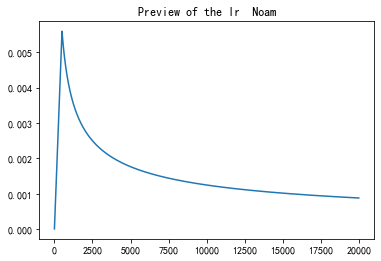

In [34]:
transformer._selct_criterion()
transformer._selct_optim('adam')
# transformer._selct_scheduler(opt='plateau',patience=5, factor=0.1, step=500)
transformer._selct_scheduler(opt='noam',patience=5, factor=0.5, step=500)
transformer.preview_noam()

In [35]:
# transformer.train(100,train_idx,valid_idx,patience=100)

In [36]:
from sklearn.model_selection import KFold
scores_folds = []
train_fold = []
valid_fold = []
n_folds = 5
kfold = KFold(n_splits = 5, random_state = 2021, shuffle = True)
epochs = 200
p = True
for fold, (trn_ind, val_ind) in enumerate(tqdm(kfold.split(dataset))):
    transformer = Train(enc_in, dec_in, c_out, seq_len, out_len, d_model, d_ff, n_heads, 
                    e_layers, d_layers, label_len, dropout, batch_size, val_batch,
                    lr, device, dataset, dataset_y)
#     transformer._build_model(Model='transformer', opt='xavier', p=p)
    transformer._build_model(Model='LSTM')
    transformer._selct_criterion()
    transformer._selct_optim('adam')
    transformer._selct_scheduler(opt='plateau',patience=5, factor=0.1, step=500)
#     transformer._selct_scheduler(opt='noam',patience=5, factor=1, step=1000)
    if p is True:
#         transformer.preview_noam()
        p = False
    print('CV {}/{}'.format(fold+1, n_folds))
    train_loss, valid_loss = transformer.train(epochs,train_idx,valid_idx,patience=20)
    train_fold.append(train_loss)
    valid_fold.append(valid_loss)
    scores_folds.append(np.min(valid_loss))
    print('CV {}|Best valid loss:{:.6f}\n'.format(fold+1, np.min(valid_loss)))
    

0it [00:00, ?it/s]

LSTM(
  (rnn): LSTM(18, 16, num_layers=2, batch_first=True, dropout=0.1)
  (fc9): Linear(in_features=32, out_features=32, bias=True)
  (fc10): Linear(in_features=32, out_features=1, bias=True)
)
CV 1/5


  0%|          | 0/200 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:75.458459 |Val_Loss:9.459079 |lr:0.001000
Validation loss decreased (inf --> 9.459079).  Saving model ...
Save here
Epoch:  2 |Train_Loss:4.041315 |Val_Loss:1.612222 |lr:0.001000
Validation loss decreased (9.459079 --> 1.612222).  Saving model ...
Save here
Epoch:  3 |Train_Loss:1.584899 |Val_Loss:1.164919 |lr:0.001000
Validation loss decreased (1.612222 --> 1.164919).  Saving model ...
Save here
Epoch:  4 |Train_Loss:1.270569 |Val_Loss:1.011264 |lr:0.001000
Validation loss decreased (1.164919 --> 1.011264).  Saving model ...
Save here
Epoch:  5 |Train_Loss:1.119366 |Val_Loss:0.944934 |lr:0.001000
Validation loss decreased (1.011264 --> 0.944934).  Saving model ...
Save here
Epoch:  6 |Train_Loss:1.085895 |Val_Loss:0.860294 |lr:0.001000
Validation loss decreased (0.944934 --> 0.860294).  Saving model ...
Save here
Epoch:  7 |Train_Loss:0.990988 |Val_Loss:0.801890 |lr:0.001000
Validation loss decreased (0.860294 --> 0.801890).  Saving model ...
Save here


  0%|          | 0/200 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:69.873487 |Val_Loss:7.581662 |lr:0.001000
Validation loss decreased (inf --> 7.581662).  Saving model ...
Save here
Epoch:  2 |Train_Loss:3.668956 |Val_Loss:1.975507 |lr:0.001000
Validation loss decreased (7.581662 --> 1.975507).  Saving model ...
Save here
Epoch:  3 |Train_Loss:1.901674 |Val_Loss:1.383998 |lr:0.001000
Validation loss decreased (1.975507 --> 1.383998).  Saving model ...
Save here
Epoch:  4 |Train_Loss:1.463067 |Val_Loss:1.079797 |lr:0.001000
Validation loss decreased (1.383998 --> 1.079797).  Saving model ...
Save here
Epoch:  5 |Train_Loss:1.231889 |Val_Loss:0.948255 |lr:0.001000
Validation loss decreased (1.079797 --> 0.948255).  Saving model ...
Save here
Epoch:  6 |Train_Loss:1.107829 |Val_Loss:0.889297 |lr:0.001000
Validation loss decreased (0.948255 --> 0.889297).  Saving model ...
Save here
Epoch:  7 |Train_Loss:1.017845 |Val_Loss:0.857573 |lr:0.001000
Validation loss decreased (0.889297 --> 0.857573).  Saving model ...
Save here


Save here
Epoch: 68 |Train_Loss:0.604063 |Val_Loss:0.560435 |lr:0.001000
Validation loss decreased (0.560446 --> 0.560435).  Saving model ...
Epoch: 69 |Train_Loss:0.605358 |Val_Loss:0.558902 |lr:0.001000
Validation loss decreased (0.560435 --> 0.558902).  Saving model ...
Epoch: 70 |Train_Loss:0.604864 |Val_Loss:0.554922 |lr:0.001000
Validation loss decreased (0.558902 --> 0.554922).  Saving model ...
Epoch: 71 |Train_Loss:0.604628 |Val_Loss:0.556499 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch: 72 |Train_Loss:0.602873 |Val_Loss:0.558526 |lr:0.001000
EarlyStopping counter: 2 out of 20
Epoch: 73 |Train_Loss:0.604253 |Val_Loss:0.554580 |lr:0.001000
Validation loss decreased (0.554922 --> 0.554580).  Saving model ...
Epoch: 74 |Train_Loss:0.603089 |Val_Loss:0.550516 |lr:0.001000
Validation loss decreased (0.554580 --> 0.550516).  Saving model ...
Save here
Epoch: 75 |Train_Loss:0.598898 |Val_Loss:0.549952 |lr:0.001000
Validation loss decreased (0.550516 --> 0.549952). 

  0%|          | 0/200 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:73.639578 |Val_Loss:10.980335 |lr:0.001000
Validation loss decreased (inf --> 10.980335).  Saving model ...
Save here
Epoch:  2 |Train_Loss:4.314239 |Val_Loss:2.258605 |lr:0.001000
Validation loss decreased (10.980335 --> 2.258605).  Saving model ...
Save here
Epoch:  3 |Train_Loss:1.877547 |Val_Loss:1.834910 |lr:0.001000
Validation loss decreased (2.258605 --> 1.834910).  Saving model ...
Save here
Epoch:  4 |Train_Loss:1.555239 |Val_Loss:1.193701 |lr:0.001000
Validation loss decreased (1.834910 --> 1.193701).  Saving model ...
Save here
Epoch:  5 |Train_Loss:1.293990 |Val_Loss:1.066023 |lr:0.001000
Validation loss decreased (1.193701 --> 1.066023).  Saving model ...
Save here
Epoch:  6 |Train_Loss:1.160763 |Val_Loss:1.139370 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch:  7 |Train_Loss:1.062298 |Val_Loss:0.996075 |lr:0.001000
Validation loss decreased (1.066023 --> 0.996075).  Saving model ...
Save here
Epoch:  8 |Train_Loss:1.003719 

Epoch: 70 |Train_Loss:0.599570 |Val_Loss:0.584732 |lr:0.001000
Validation loss decreased (0.585759 --> 0.584732).  Saving model ...
Save here
Epoch: 71 |Train_Loss:0.596956 |Val_Loss:0.581813 |lr:0.001000
Validation loss decreased (0.584732 --> 0.581813).  Saving model ...
Save here
Epoch: 72 |Train_Loss:0.596339 |Val_Loss:0.586309 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch: 73 |Train_Loss:0.596218 |Val_Loss:0.591720 |lr:0.001000
EarlyStopping counter: 2 out of 20
Save here
Epoch: 74 |Train_Loss:0.593503 |Val_Loss:0.580406 |lr:0.001000
Validation loss decreased (0.581813 --> 0.580406).  Saving model ...
Save here
Epoch: 75 |Train_Loss:0.592710 |Val_Loss:0.584214 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch: 76 |Train_Loss:0.591628 |Val_Loss:0.587597 |lr:0.001000
EarlyStopping counter: 2 out of 20
Save here
Epoch: 77 |Train_Loss:0.590827 |Val_Loss:0.580864 |lr:0.001000
EarlyStopping counter: 3 out of 20
Epoch: 78 |Train_Loss:0.591676 |Val_Loss:0.5

Save here
Epoch:143 |Train_Loss:0.546329 |Val_Loss:0.546879 |lr:0.001000
EarlyStopping counter: 16 out of 20
Save here
Epoch:144 |Train_Loss:0.546300 |Val_Loss:0.546486 |lr:0.001000
EarlyStopping counter: 17 out of 20
Epoch:145 |Train_Loss:0.546384 |Val_Loss:0.539778 |lr:0.001000
Validation loss decreased (0.545756 --> 0.539778).  Saving model ...
Save here
Epoch:146 |Train_Loss:0.544344 |Val_Loss:0.556123 |lr:0.001000
EarlyStopping counter: 1 out of 20
Epoch:147 |Train_Loss:0.544384 |Val_Loss:0.550625 |lr:0.001000
EarlyStopping counter: 2 out of 20
Epoch:148 |Train_Loss:0.545037 |Val_Loss:0.551289 |lr:0.001000
EarlyStopping counter: 3 out of 20
Save here
Epoch:149 |Train_Loss:0.544208 |Val_Loss:0.548909 |lr:0.001000
EarlyStopping counter: 4 out of 20
Save here
Epoch:150 |Train_Loss:0.543551 |Val_Loss:0.545250 |lr:0.001000
EarlyStopping counter: 5 out of 20
Save here
Epoch:151 |Train_Loss:0.541456 |Val_Loss:0.541834 |lr:0.001000
EarlyStopping counter: 6 out of 20
Save here
Epoch:152 |T

  0%|          | 0/200 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:77.875948 |Val_Loss:7.161178 |lr:0.001000
Validation loss decreased (inf --> 7.161178).  Saving model ...
Save here
Epoch:  2 |Train_Loss:2.777553 |Val_Loss:1.564040 |lr:0.001000
Validation loss decreased (7.161178 --> 1.564040).  Saving model ...
Save here
Epoch:  3 |Train_Loss:1.620152 |Val_Loss:1.286166 |lr:0.001000
Validation loss decreased (1.564040 --> 1.286166).  Saving model ...
Save here
Epoch:  4 |Train_Loss:1.295453 |Val_Loss:0.967581 |lr:0.001000
Validation loss decreased (1.286166 --> 0.967581).  Saving model ...
Save here
Epoch:  5 |Train_Loss:1.168923 |Val_Loss:1.161067 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch:  6 |Train_Loss:1.089027 |Val_Loss:0.854781 |lr:0.001000
Validation loss decreased (0.967581 --> 0.854781).  Saving model ...
Save here
Epoch:  7 |Train_Loss:1.018997 |Val_Loss:0.828813 |lr:0.001000
Validation loss decreased (0.854781 --> 0.828813).  Saving model ...
Save here
Epoch:  8 |Train_Loss:0.949151 |Va

Save here
Epoch: 72 |Train_Loss:0.613701 |Val_Loss:0.560451 |lr:0.001000
Validation loss decreased (0.562599 --> 0.560451).  Saving model ...
Epoch: 73 |Train_Loss:0.615407 |Val_Loss:0.572316 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch: 74 |Train_Loss:0.613198 |Val_Loss:0.567718 |lr:0.001000
EarlyStopping counter: 2 out of 20
Epoch: 75 |Train_Loss:0.614939 |Val_Loss:0.562479 |lr:0.001000
EarlyStopping counter: 3 out of 20
Save here
Epoch: 76 |Train_Loss:0.610435 |Val_Loss:0.565305 |lr:0.001000
EarlyStopping counter: 4 out of 20
Epoch: 77 |Train_Loss:0.611371 |Val_Loss:0.565722 |lr:0.001000
EarlyStopping counter: 5 out of 20
Save here
Epoch: 78 |Train_Loss:0.607497 |Val_Loss:0.554106 |lr:0.001000
Validation loss decreased (0.560451 --> 0.554106).  Saving model ...
Epoch: 79 |Train_Loss:0.609442 |Val_Loss:0.562003 |lr:0.001000
EarlyStopping counter: 1 out of 20
Epoch: 80 |Train_Loss:0.607767 |Val_Loss:0.563089 |lr:0.001000
EarlyStopping counter: 2 out of 20
Save here


Save here
Epoch:144 |Train_Loss:0.542011 |Val_Loss:0.515371 |lr:0.000100
EarlyStopping counter: 7 out of 20
Epoch:145 |Train_Loss:0.542797 |Val_Loss:0.515558 |lr:0.000100
EarlyStopping counter: 8 out of 20
Epoch:146 |Train_Loss:0.542818 |Val_Loss:0.515085 |lr:0.000100
EarlyStopping counter: 9 out of 20
Epoch:147 |Train_Loss:0.542741 |Val_Loss:0.515054 |lr:0.000100
EarlyStopping counter: 10 out of 20
Epoch:148 |Train_Loss:0.543541 |Val_Loss:0.515390 |lr:0.000100
EarlyStopping counter: 11 out of 20
Epoch:149 |Train_Loss:0.542397 |Val_Loss:0.515462 |lr:0.000100
EarlyStopping counter: 12 out of 20
Save here
Epoch:150 |Train_Loss:0.541777 |Val_Loss:0.515199 |lr:0.000100
EarlyStopping counter: 13 out of 20
Epoch:151 |Train_Loss:0.542511 |Val_Loss:0.515229 |lr:0.000100
EarlyStopping counter: 14 out of 20
Epoch:152 |Train_Loss:0.542521 |Val_Loss:0.515191 |lr:0.000100
EarlyStopping counter: 15 out of 20
Save here
Epoch:153 |Train_Loss:0.541164 |Val_Loss:0.514887 |lr:0.000100
Validation loss dec

  0%|          | 0/200 [00:00<?, ?it/s]

Save here
Epoch:  1 |Train_Loss:72.519768 |Val_Loss:8.236312 |lr:0.001000
Validation loss decreased (inf --> 8.236312).  Saving model ...
Save here
Epoch:  2 |Train_Loss:3.914581 |Val_Loss:2.032240 |lr:0.001000
Validation loss decreased (8.236312 --> 2.032240).  Saving model ...
Save here
Epoch:  3 |Train_Loss:1.896835 |Val_Loss:1.370961 |lr:0.001000
Validation loss decreased (2.032240 --> 1.370961).  Saving model ...
Save here
Epoch:  4 |Train_Loss:1.396912 |Val_Loss:1.222088 |lr:0.001000
Validation loss decreased (1.370961 --> 1.222088).  Saving model ...
Save here
Epoch:  5 |Train_Loss:1.227804 |Val_Loss:0.918529 |lr:0.001000
Validation loss decreased (1.222088 --> 0.918529).  Saving model ...
Save here
Epoch:  6 |Train_Loss:1.088890 |Val_Loss:1.013443 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch:  7 |Train_Loss:0.992180 |Val_Loss:0.906472 |lr:0.001000
Validation loss decreased (0.918529 --> 0.906472).  Saving model ...
Save here
Epoch:  8 |Train_Loss:0.962891 |Va

Save here
Epoch: 71 |Train_Loss:0.615315 |Val_Loss:0.563482 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch: 72 |Train_Loss:0.612248 |Val_Loss:0.557471 |lr:0.001000
EarlyStopping counter: 2 out of 20
Epoch: 73 |Train_Loss:0.613946 |Val_Loss:0.557990 |lr:0.001000
EarlyStopping counter: 3 out of 20
Epoch: 74 |Train_Loss:0.614588 |Val_Loss:0.580124 |lr:0.001000
EarlyStopping counter: 4 out of 20
Save here
Epoch: 75 |Train_Loss:0.612155 |Val_Loss:0.549949 |lr:0.001000
Validation loss decreased (0.553360 --> 0.549949).  Saving model ...
Save here
Epoch: 76 |Train_Loss:0.609843 |Val_Loss:0.548083 |lr:0.001000
Validation loss decreased (0.549949 --> 0.548083).  Saving model ...
Epoch: 77 |Train_Loss:0.610288 |Val_Loss:0.572695 |lr:0.001000
EarlyStopping counter: 1 out of 20
Save here
Epoch: 78 |Train_Loss:0.606746 |Val_Loss:0.554944 |lr:0.001000
EarlyStopping counter: 2 out of 20
Save here
Epoch: 79 |Train_Loss:0.604836 |Val_Loss:0.557899 |lr:0.001000
EarlyStopping counter: 3 

Epoch:145 |Train_Loss:0.562875 |Val_Loss:0.533613 |lr:0.001000
EarlyStopping counter: 4 out of 20
Save here
Epoch:146 |Train_Loss:0.561124 |Val_Loss:0.530818 |lr:0.001000
EarlyStopping counter: 5 out of 20
Save here
Epoch:147 |Train_Loss:0.560746 |Val_Loss:0.528044 |lr:0.001000
Validation loss decreased (0.529376 --> 0.528044).  Saving model ...
Save here
Epoch:148 |Train_Loss:0.560175 |Val_Loss:0.528171 |lr:0.001000
EarlyStopping counter: 1 out of 20
Epoch:149 |Train_Loss:0.560431 |Val_Loss:0.529306 |lr:0.001000
EarlyStopping counter: 2 out of 20
Epoch:150 |Train_Loss:0.560876 |Val_Loss:0.520411 |lr:0.001000
Validation loss decreased (0.528044 --> 0.520411).  Saving model ...
Save here
Epoch:151 |Train_Loss:0.558291 |Val_Loss:0.521624 |lr:0.001000
EarlyStopping counter: 1 out of 20
Epoch:152 |Train_Loss:0.558293 |Val_Loss:0.524946 |lr:0.001000
EarlyStopping counter: 2 out of 20
Epoch:153 |Train_Loss:0.559603 |Val_Loss:0.525289 |lr:0.001000
EarlyStopping counter: 3 out of 20
Save here


In [37]:
scores_folds

[0.0, 0.0, 0.5226878686384722, 0.0, 0.5043195323510603]

In [48]:
valid_fold[3]

array([7.16117764, 1.56404024, 1.28616568, 0.96758054, 1.16106745,
       0.85478078, 0.82881299, 0.82829959, 0.76303506, 0.78482088,
       0.74431789, 0.89625799, 0.71358478, 0.67848532, 0.8147211 ,
       0.69253045, 0.66987843, 0.70048531, 0.7128912 , 0.66041686,
       0.63477387, 0.63      , 0.61873172, 0.68665714, 0.62631828,
       0.60809804, 0.60475953, 0.62720805, 0.62755483, 0.60242933,
       0.63570839, 0.6002491 , 0.60316001, 0.58568594, 0.58381316,
       0.61114141, 0.60096517, 0.60747341, 0.59060267, 0.60195825,
       0.58673494, 0.58264081, 0.58399226, 0.60593396, 0.58630792,
       0.58274411, 0.56832114, 0.61012899, 0.60217881, 0.60929171,
       0.58863896, 0.59628894, 0.58966115, 0.56356498, 0.58506002,
       0.57438085, 0.57855431, 0.58502884, 0.57265426, 0.57880092,
       0.58190005, 0.57101671, 0.57248921, 0.57713806, 0.57843549,
       0.57439085, 0.56534109, 0.58099581, 0.56974804, 0.56368145,
       0.56259895, 0.56045142, 0.57231649, 0.5677185 , 0.56247

In [51]:
np.min(valid_fold[3][:-20])

0.513634817166762

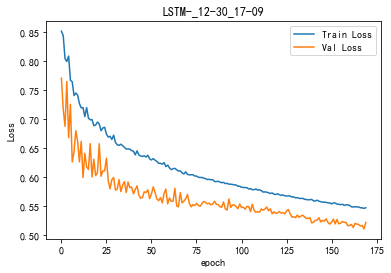

Min Train Loss:0.545450 at 168|Min Valid Loss:0.510011 at 168


In [52]:
transformer.PlotLoss(train_fold[4][10:-20], valid_fold[4][10:-20])

In [54]:
transformer.show_plot(1000,6,"Single Step Prediction")

RuntimeError: Input and parameter tensors are not at the same device, found input tensor at cpu and parameter tensor at cuda:0